In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\Lenovo\ds\datasets\AAPL.csv")

In [21]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [6]:
df1 = df.reset_index()['close']

In [7]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [8]:
import matplotlib.pyplot as plt

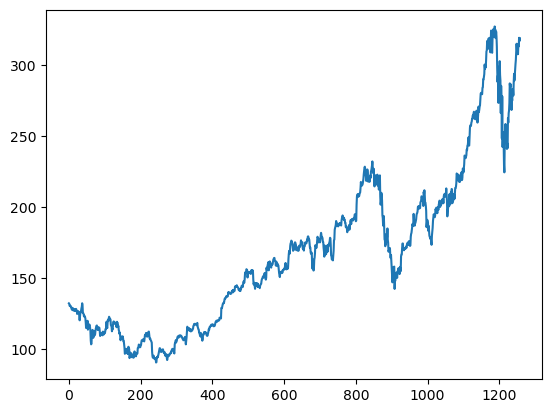

In [9]:
plt.plot(df1)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [42]:
df1.shape

(1258, 1)

In [43]:
# Splitting data into test and train
training_size = int(len(df1)*0.65)
testing_size = len(df1)-training_size
training_data, testing_data = df1[:training_size, :], df1[training_size:len(df), :1]
training_size, testing_size

(817, 441)

In [44]:
len(training_data)

817

In [45]:
len(testing_data)

441

In [51]:
testing_data[1:10, 0]

array([0.52837119, 0.53119986, 0.53871485, 0.5461454 , 0.55999324,
       0.56864815, 0.57962509, 0.58270708, 0.57641645])

In [52]:
testing_data[11,0]

0.5529004475217429

In [46]:
# convert an array of values into a dataset matrix


In [54]:
def create_dataset(dataset, timestep=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - timestep-1):
        a = dataset[i:(i+timestep), 0]   ## i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i+timestep, 0])
    return np.array(dataX), np.array(dataY)

In [58]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
timestep = 100
X_train, Y_train = create_dataset(training_data, timestep)

In [60]:
print(X_train.shape), print(Y_train.shape)


(716, 100)
(716,)


(None, None)

In [61]:
X_test, Y_test = create_dataset(testing_data, timestep)

In [65]:
len(X_test)

340

In [64]:
len(Y_test)

340

In [67]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [78]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [79]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - loss: 0.0258 - val_loss: 0.0689
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0052 - val_loss: 0.0045
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 0.0019 - val_loss: 0.0049
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - loss: 8.3691e-04 - val_loss: 0.0075
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 7.2825e-04 - val_loss: 0.0053
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 6.3093e-04 - val_loss: 0.0040
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 5.5880e-04 - val_loss: 0.0047
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 5.7651e-04 - val_loss: 0.0040
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 5.6918e-04 - val_loss: 0.0034
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 5.8216e-04 - val_loss: 0.0033
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 5.9569e-04 - val_loss: 0.0036
Epoch 12/100


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 2.7905e-04 - val_loss: 0.0017
Epoch 67/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - loss: 2.2855e-04 - val_loss: 0.0028
Epoch 68/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 3.1535e-04 - val_loss: 0.0012
Epoch 69/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - loss: 2.7416e-04 - val_loss: 0.0018
Epoch 70/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - loss: 2.2360e-04 - val_loss: 0.0011
Epoch 71/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 2.1573e-04 - val_loss: 0.0012
Epoch 72/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 2.0241e-04 - val_loss: 0.0012
Epoch 73/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 2.1650e-04 - val_loss: 0.0011
Epoch 74/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 1.9941e-04 - val_loss: 0.0014
Epoch 75/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 1.8947e-04 - val_loss: 0.0013
Epoch 76/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - loss: 2.2669e-04 - val_loss: 0.0017
E

In [83]:
train_predict = model.predict(X_train)
test_predict= model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [84]:
##Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [86]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))


142.51627224519382

In [88]:
### Test Data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

239.45738065171332

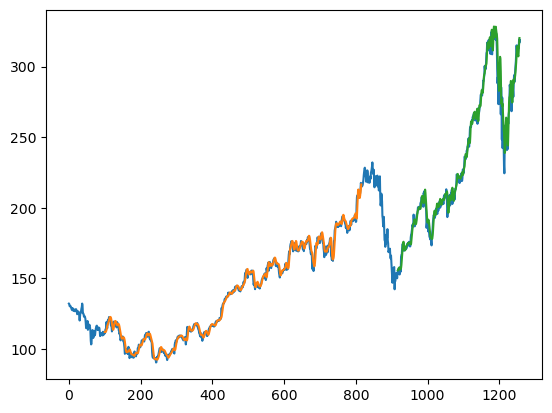

In [90]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [92]:
len(testing_data)


441

In [93]:
x_input=testing_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [94]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [95]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [96]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.96935004]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

9 day output [[0.9914928]]
10 day input [0.93304061 0.94950604 0.96424048 0.95512117 0.95989192 0.96635143
 0.96246728 0.92295027 0.9598497  0.98792536 0.98594106 0.92531453
 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625
 0.96795575 1.         0.99016297 0.99050072 0.96538039 0.98488559
 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823
 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995
 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044
 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111
 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492
 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106
 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403
 0.90095415 0.92793211 0.948535   0.93333615 0.91746179 0.92544119
 0.91771511 0.9483239 

18 day output [[1.0276453]]
19 day input [0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211 0.948535
 0.93333615 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004
 0.96635143 0.9563033  0.96491598 0.96935004 0.96624774 0.96609074
 0.96807617 0.9713316  0.

27 day output [[1.0737656]]
28 day input [0.96795575 1.         0.99016297 0.99050072 0.96538039 0.98488559
 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823
 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995
 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044
 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111
 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492
 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106
 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403
 0.90095415 0.92793211 0.948535   0.93333615 0.91746179 0.92544119
 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598
 0.96935004 0.96624774 0.96609074 0.96807617 0.9713316  0.97529316
 0.97956115 0.98381007 0.98781496 0.99149281 0.99490273 0.9982006
 1.00157225 1.00517416

In [97]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [98]:
len(df1)

1258

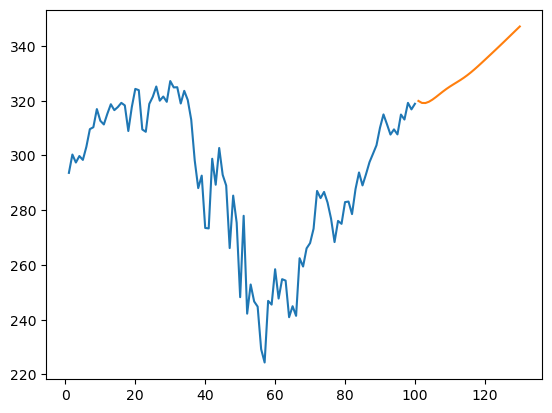

In [99]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

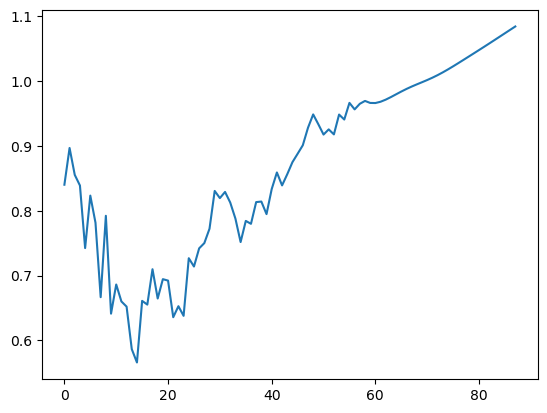

In [100]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [101]:
df3=scaler.inverse_transform(df3).tolist()


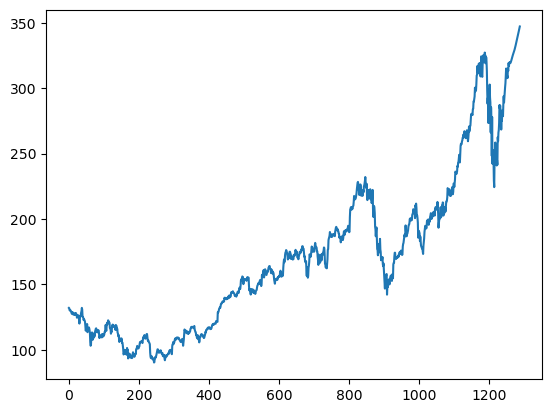

In [102]:
plt.plot(df3)